In [8]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
image_path = "images/train/Cheque309149.jpg"         # path to your image
label_path = "labels/train/Cheque309149.txt"         # corresponding label file
class_file = "predefined_classes.txt"          # class names file
img_size = (640, 640)                           # if your YOLO model used 640x640

In [3]:
image = cv2.imread(image_path)
h, w = image.shape[:2]

# Load class names
with open(class_file, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

In [4]:
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f.readlines():
            cls_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert YOLO format to pixel coordinates
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)

            # Draw rectangle and label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = class_names[int(cls_id)]
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("Label file not found!")

In [6]:
cv2.imshow("Cheque with Labels", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

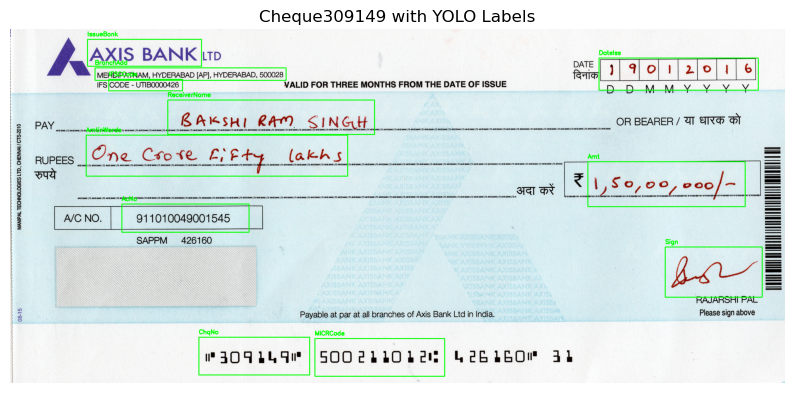

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Cheque309149 with YOLO Labels")
plt.show()

In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLOv8 model
model = YOLO("runs/detect/cheque_model_v82/weights/best.pt")

# Inference on cheque image
img_path = "images/train/Cheque309149.jpg"
results = model(img_path, save=True, conf=0.5)

# Automatically get the saved image path
save_dir = results[0].save_dir
saved_images = [f for f in os.listdir(save_dir) if f.lower().endswith(('.jpg', '.png'))]
assert len(saved_images) > 0, f"No image found in {save_dir}"

save_path = os.path.join(save_dir, saved_images[0])

# Display prediction
img = Image.open(save_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Bounding Boxes")
plt.show()


c:\Users\prana\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(



image 1/1 c:\Users\prana\Downloads\ChequeDetection-YOLO\ChequeDataset\images\train\Cheque309149.jpg: 320x640 1 IssueBank, 1 ReceiverName, 1 AcNo, 1 Amt, 1 ChqNo, 1 DateIss, 1 Sign, 1 MICRCode, 1 AmtinWords, 1 BranchAdd, 217.1ms
Speed: 19.1ms preprocess, 217.1ms inference, 32.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict


: 

In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load model
model = YOLO("runs/detect/cheque_model_v82/weights/best.pt")

# Path to input image
img_path = "images/train/Cheque309149.jpg"

# Run inference
results = model(img_path, save=True)

# Get saved image path
save_dir = results[0].save_dir
filename = os.path.basename(img_path)
output_path = os.path.join(save_dir, filename)

# Display image
img = Image.open(output_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Result")
plt.show()


c:\Users\prana\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(



image 1/1 c:\Users\prana\Downloads\ChequeDetection-YOLO\ChequeDataset\images\train\Cheque309149.jpg: 320x640 1 IssueBank, 1 ReceiverName, 1 AcNo, 1 Amt, 1 ChqNo, 1 DateIss, 1 Sign, 1 MICRCode, 1 IFSCCode, 1 AmtinWords, 1 BranchAdd, 106.9ms
Speed: 5.3ms preprocess, 106.9ms inference, 3.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict2


: 

In [4]:

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


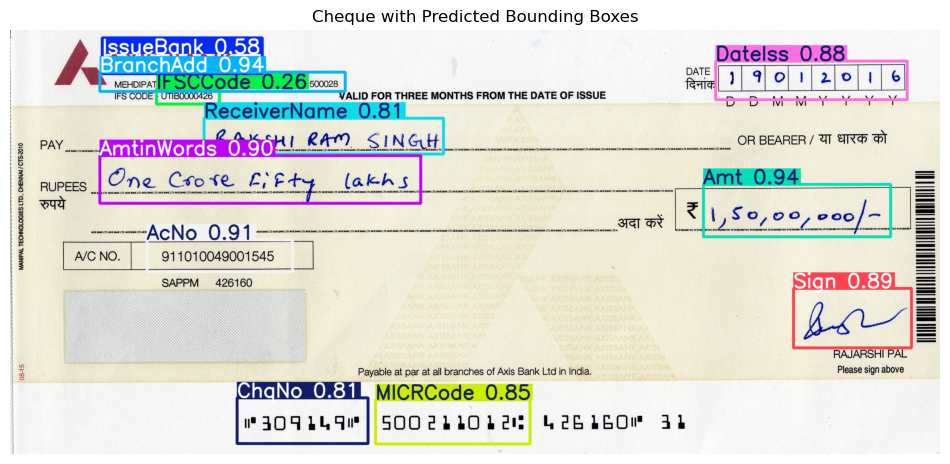


image 1/1 c:\Users\prana\Downloads\ChequeDetection-YOLO\ChequeDataset\images\train\Cheque309149.jpg: 320x640 1 IssueBank, 1 ReceiverName, 1 AcNo, 1 Amt, 1 ChqNo, 1 DateIss, 1 Sign, 1 MICRCode, 1 AmtinWords, 1 BranchAdd, 92.5ms
Speed: 27.5ms preprocess, 92.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
[✅] Saved cropped image to try\Amt_0.jpg
[✅] Saved cropped image to try\BranchAdd_1.jpg
[✅] Saved cropped image to try\AcNo_2.jpg
[✅] Saved cropped image to try\AmtinWords_3.jpg
[✅] Saved cropped image to try\Sign_4.jpg
[✅] Saved cropped image to try\DateIss_5.jpg
[✅] Saved cropped image to try\MICRCode_6.jpg
[✅] Saved cropped image to try\ChqNo_7.jpg
[✅] Saved cropped image to try\ReceiverName_8.jpg
[✅] Saved cropped image to try\IssueBank_9.jpg


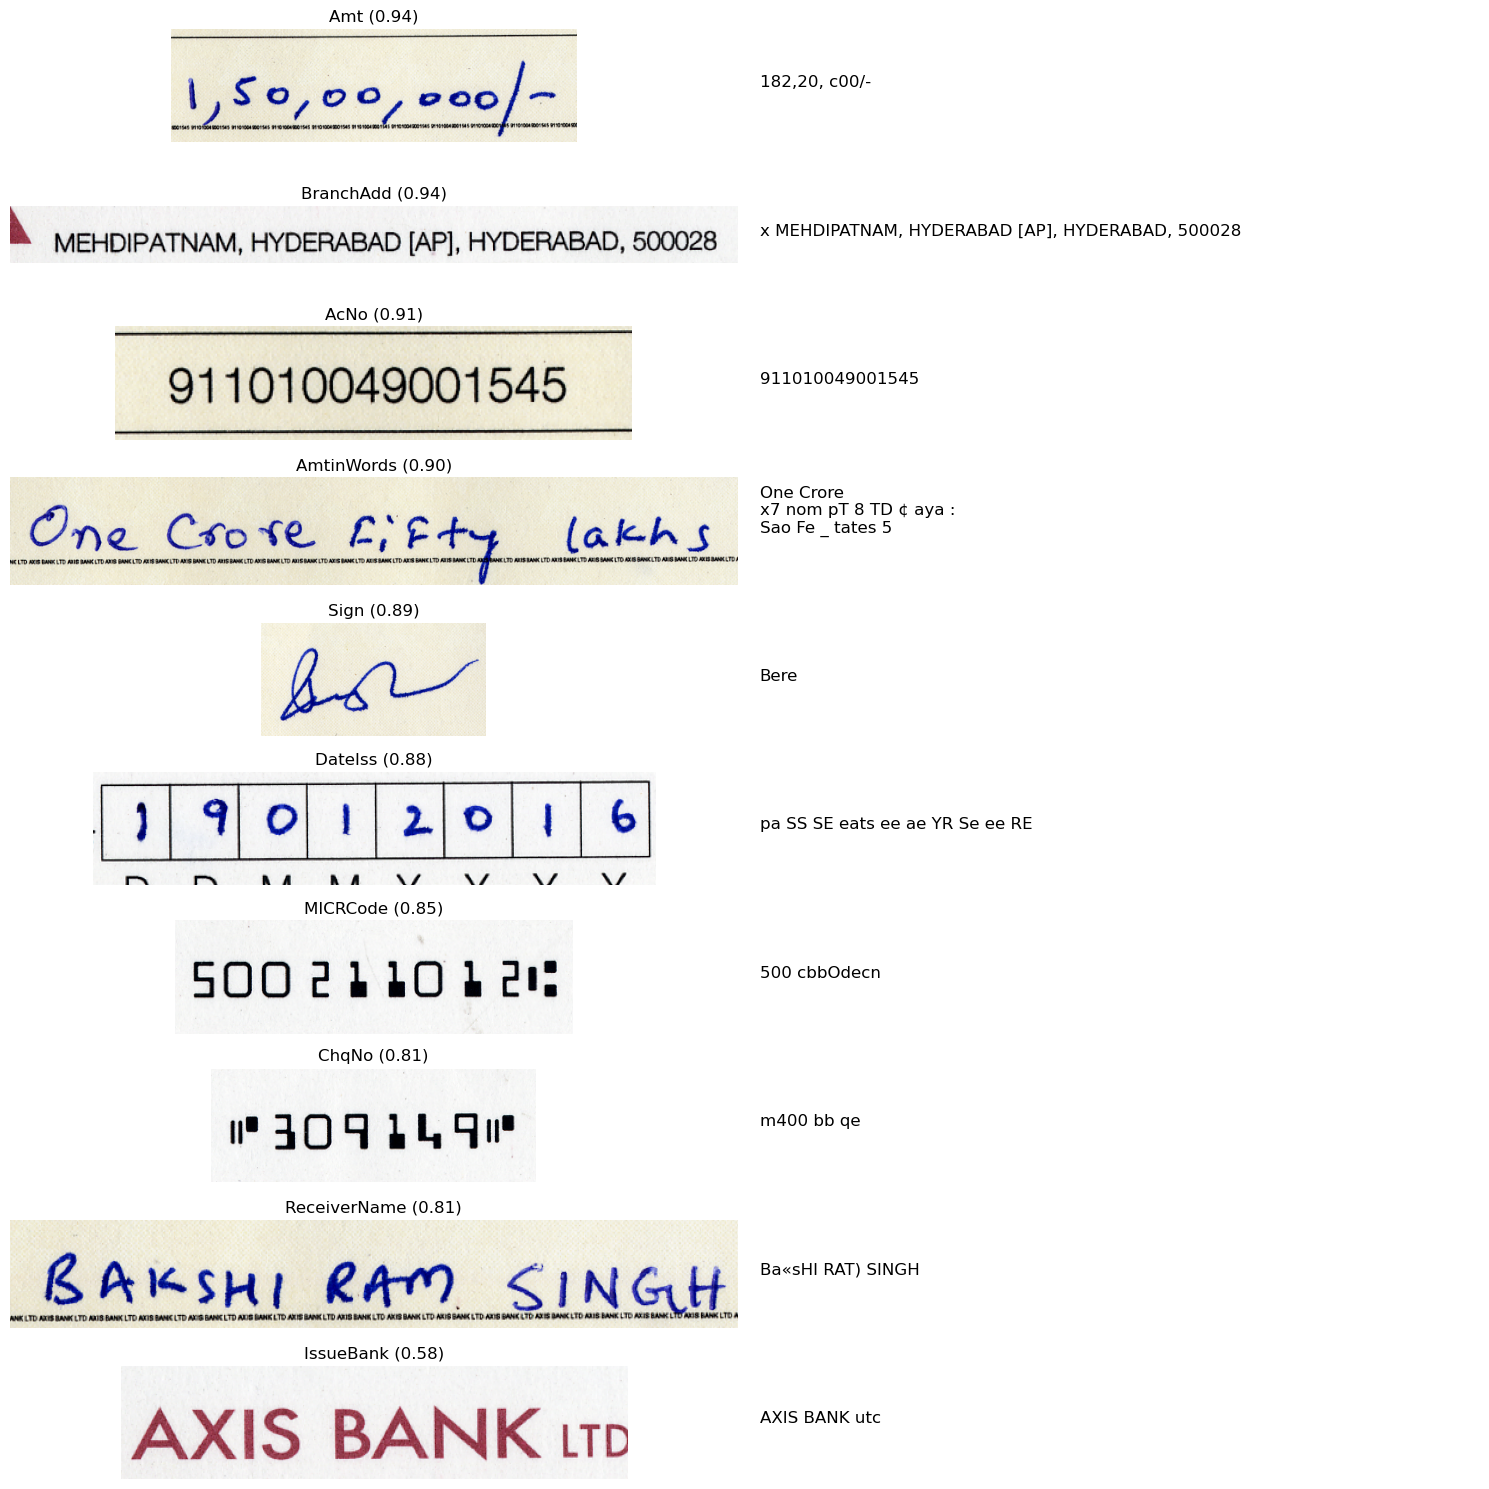

In [6]:
from ultralytics import YOLO
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set Tesseract path (update if your path is different)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load YOLOv8 model
model = YOLO("runs/detect/cheque_model_v82/weights/best.pt")

# Image path (with predictions drawn already)
image_path = r"C:\Users\prana\Downloads\ChequeDetection-YOLO\ChequeDataset\runs\detect\predict2\Cheque309149.jpg"

# Display full image with YOLO predictions
img = Image.open(image_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Cheque with Predicted Bounding Boxes")
plt.show()

# Run fresh inference to get bounding boxes
results = model("images/train/Cheque309149.jpg", conf=0.5)

# Reload image with OpenCV (for cropping)
orig_img = cv2.imread("images/train/Cheque309149.jpg")

# Class names from the model
class_names = model.names

# Create output directory
output_dir = "try"
os.makedirs(output_dir, exist_ok=True)

# Plot cropped fields + OCR
plt.figure(figsize=(15, 15))

for i, r in enumerate(results):
    for j, box in enumerate(r.boxes):
        cls_id = int(box.cls[0])
        class_name = class_names[cls_id]
        conf = float(box.conf[0])
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

        # Crop from original image
        crop = orig_img[y1:y2, x1:x2]
        crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        pil_crop = Image.fromarray(crop_rgb)

        # === SAVE CROP ===
        save_path = os.path.join(output_dir, f"{class_name}_{j}.jpg")
        pil_crop.save(save_path)
        print(f"[✅] Saved cropped image to {save_path}")

        # Run OCR
        ocr_text = pytesseract.image_to_string(pil_crop, config='--psm 6')

        # Display
        plt.subplot(len(r.boxes), 2, 2 * j + 1)
        plt.imshow(pil_crop)
        plt.axis('off')
        plt.title(f"{class_name} ({conf:.2f})")

        plt.subplot(len(r.boxes), 2, 2 * j + 2)
        plt.text(0.01, 0.5, ocr_text.strip(), fontsize=12)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Load model & processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Load cropped image of handwritten field (replace path)
image = Image.open("try/AmtinWords_3.jpg").convert("RGB")

# Process image and generate text
pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("📌 Handwritten Text:", generated_text)


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

c:\Users\prana\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

c:\Users\prana\anaconda3\Lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


📌 Handwritten Text: One Crove Fifty-lakhs.
